# Chap05 - Support Vector Machine

**SVM**(Support Vector Machine)은 러시아 과학자 *Vladimir Vapnik*가 1970년대 후반에 제안한 알고리즘으로, 그 당시에는 크게 주목 받지 못했다. 하지만 1990년대에 들어 분류(classification)문제에서 우수한 일반화(generalization) 능력이 입증되어 머신러닝 알고리즘에서 인기 있는 모델이 되었다고 한다. 그리고 SVM은 일반화 측면에서 다른 분류 모델과 비교하여 더 좋거나 대등한 것으로 알려져 있다. 

또한, SVM은 선형 또는 비선형 분류 뿐만아니라 회귀, 이상치 탐색에도 사용할 수 있는 모델이며, 특히 복잡한 분류 문제에 잘 맞으며, 중간 크기의 데이터셋에 적합하다.

## Set Up

In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

## 5.1 Linear SVM Classification

Linear SVM은 Train set을 분류할 수 있는 선형분리를 찾는 것이며, 즉 최적의 Decision Boundary(의사결정 영역)를 찾는다고 할 수 있다.

![](./images/svm01.png)

#### Large Margin Classification

**Large Margin Classification** 은 위의 그림 중 오른쪽 그림과 같이 두 데이터의 클래스를 분리할 수 있는 무수히 많은 직선들 중 두 데이터 클래스간의 간격(margin)이 최대로하는 **MMH**(Maximum Marginal Hyperplane, 최대 마진 초평면)을 찾아 분리하는 방법을 말한다.

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))  #For C=inf, all the constraints are enforced
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
print(svm_clf.coef_[0])
print(svm_clf.intercept_)

[1.29411744 0.82352928]
[-3.78823471]


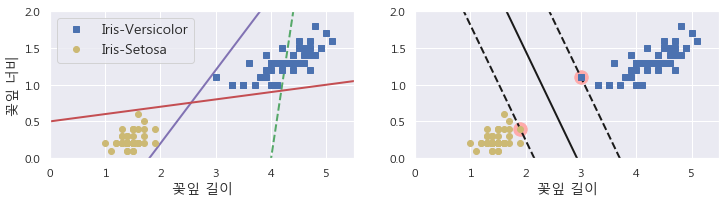

In [5]:
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_  # support vectors
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

위의 그림 중 오른쪽 그래프에서 붉은색으로 표시된 점, 즉 데이터 포인트를 **Support Vector**라고 하는데 그 이유는 Margin이 이 붉은색으로 표시된 데이터에 의해 결정되기 때문이다. 

#### 특성(Feature)의 스케일에 민감 

[-2, 2, -2, 2]

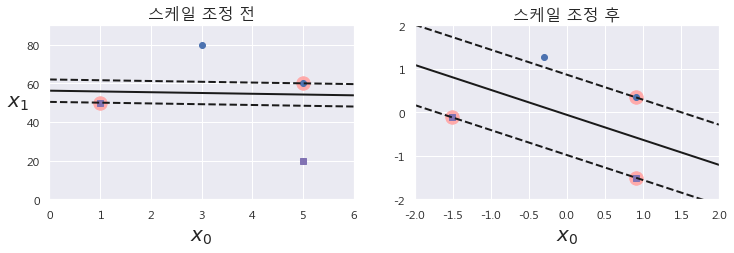

In [10]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64) #feature의 스케일 차이남 
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("스케일 조정 전", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("스케일 조정 후", fontsize=16)
plt.axis([-2, 2, -2, 2])

### 5.1.1 Soft Margin Classification

위에서 살펴본 SVM 방식은 하드마진(Hard Margin) SVM이라고 한다. 하드마진 방식은 매우 엄격하게 두 개의 클래스를 분리하는 분리초평면(위에서는 선형분리)을 구하는 방법으로, 모든 Train Set은 분리 초평면을 사이에 두고 무조건 한 클래스에 속해야 한다. 

하지만, 아래의 예제에서도 알 수 있듯이 몇 개의 노이즈 또는 이상치로 인해 두 클래스를 분류하는 분리 초평면을 구할 수 조차 없거나(아래의 왼쪽 그래프), 제대로 구하지 못할 수도 있다(아래의 오른쪽 그래프).

#### 이상치(Outlier)에 민감

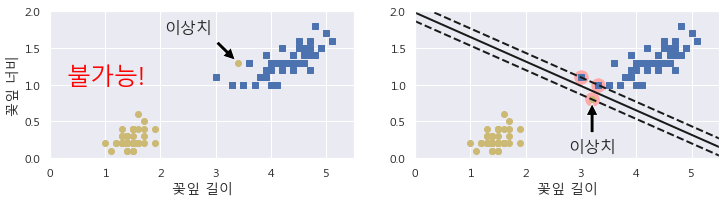

In [11]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]]) # outlier 생성
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "불가능!", fontsize=24, color="red")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

위와 같은 문제를 해결하기 위해, **소프트 마진**(Soft Margin) SVM이 개발 되었다. 소프트 마진 SVM은 기본적으로 하드 마진 방법을 기반으로 하는데, 가장 큰 차이점은 Support Vectors가 위치한 경계선에 약간의 **여유 변수**(Slack Variable)을 두는 것이다.

Scikit-Learn의 SVM 모델에서는 이러한 여유 변수로 `C`라는 하이퍼파라미터를 제공한다. `C`는 일종의 **penalty**라고 볼 수 있다.

- `C` 값을 줄이면 오류를 허용하는 정도가 커지며, Margin 또한 커진다.
- `C` 값을 크게하면 오류를 허용하는 정도가 작아지며, Margin 또한 작아진다.

아래의 예제코드는 Iris(붓꽃) 데이터셋 중 Virginca 인지 아닌지 분류하는 이진 분류기를 Scikit-Learn의 `LinearSVC`를 이용해 구현한 코드이다. 여기서 `C`의 값은 `1`로 지정했다.

In [12]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal lenght, petal width
y = (iris['target'] == 2).astype(np.float64)  # Iris - Virginca면 1 아니면 0

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('liear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('liear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [13]:
svm_clf.predict([[5.5, 1.7]]) # SVM은 class에 속할 확률을 계산해주지 않음

array([1.])

이번에는 `C=1`일때와 `C=100`일때의 결과를 비교해 보자.

In [14]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [15]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()   #??
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

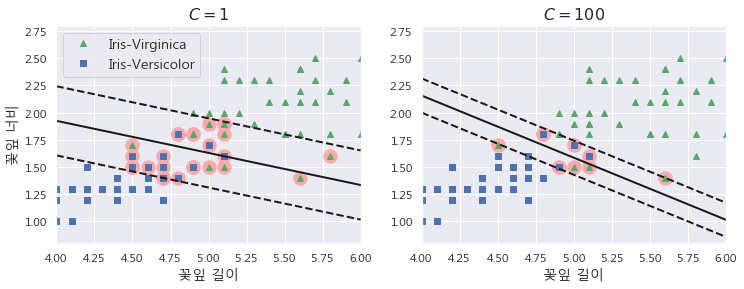

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8]);

## 5.2 NonLinear SVM Classification

실제 데이터셋은 위에서 살펴본 Linear SVM으로 분류할 수 없는 즉, 선형적으로 분류할 수 없는 비선형 적인 데이터셋이 많다. 

이러한, 비선형 데이터셋을 다루는 한 가지 방법은 다항 특성(polynomial features)과 같은 특성을 추가하는 방법이 있다. 

아래의 예제는 $x_1$ 특성에 $x_2 = (x_1)^{2}$ 을 추가하여 2차원의 데이터셋을 만들어 선형분리가 가능하게끔 해준것이다.

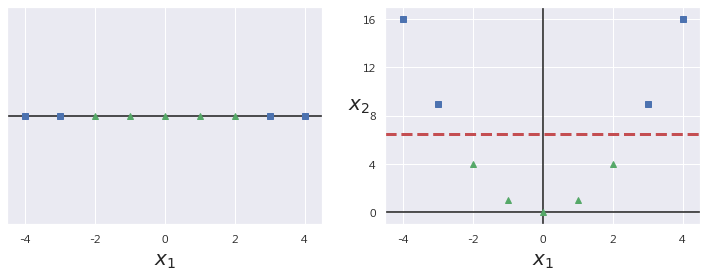

In [27]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

Scikit-Learn의 `datasets`에서 `make_moons` 데이터(Scikit-Learn에서 제공하는 두개의 반달 모양 데이터셋)를 이용해 다항 특성을 추가하는 `PolynomialFeatures`와 `StandardScaler` 그리고 `LinearSVC`를 `Pipeline`을 이용해 분류기를 만들어 보자.

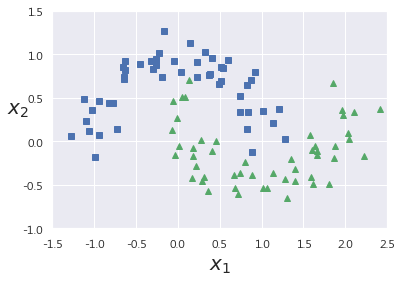

In [30]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

C:\Users\Jae-Eun\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

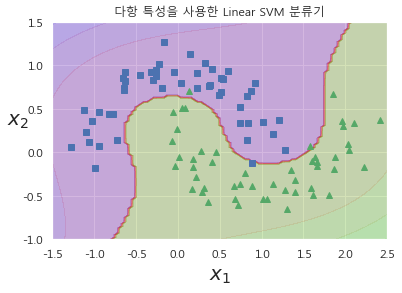

In [32]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('다항 특성을 사용한 Linear SVM 분류기')
plt.show()

### 5.2.1 다항식 커널 (Polynomial Kernel)

위에서 처럼 다항식 특성을 추가하는 것은 간단한 방법이지만, 많은 다항식 특성들이 추가되게 되면 모델의 속도가 느려진다. 

SVM에서는 이를 해결하기 위해 **커널 트릭**(kernel trick)을 이용한다. 


$$
K \left( \mathbf{a}, \mathbf{b} \right) = \left( \gamma \mathbf{a}^{T} \cdot \mathbf{b} + r \right)^{d}
$$

아래의 예제 코드는 바로 위의 코드를 kernel trick을 이용해 SVM모델을 만든것이다. Scikit-Learn에서 [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) 클래스에서 커널(kernel)을 사용할 수 있다. `SVC`의 인자 중 `coef0`은 위의 식에서 $r$에 해당하는 부분이다. 

- 커널은 차수가 높아질 수록 $r < 1$ 인 값과 $r > 1$ 인 값의 차이가 크므로 `coef0`을 적절히 조절하면 고차항의 영향을 줄일 수 있다.

In [33]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=0.1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [34]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

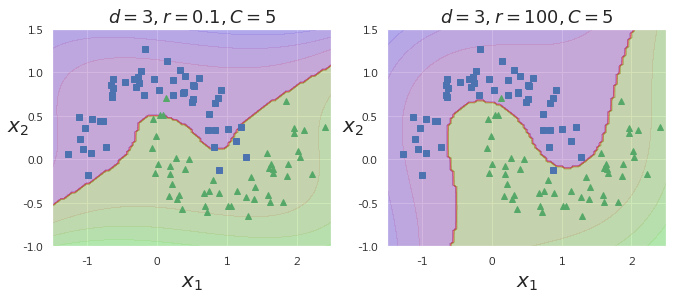

In [35]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=0.1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=100, C=5$", fontsize=18)

plt.show()

### 5.2.2 유사도 특성 추가

비선형 특성을 다루는 또 다른 방법은 각 데이터(샘플)이 특정 **랜드마크**(landmark)와 얼마나 닮았는지 측정하는 **유사도 함수**(similarity function)로 계산한 특성을 추가하는 것이다. 

예를 들어, 아래의 그래프와 같이 $x_2 = -2$와 $x_3 = 1$을 랜드마크라고 하고, $\gamma = 0.3$인 가우시안 **RBF**(Radial Basis Function, 방사 기저 함수)를 유사도 함수라고 정의해보자.

$$
\phi_{\gamma} \left( \mathbf{x}, \ell \right) = \text{exp} \left( -\gamma \left\| \mathbf{x} - \ell \right\|^{2} \right)
$$

- $\ell$ : 랜드마크 지점
- $\gamma$ : $\gamma > 0$ 이며, 값이 작을 수록 넓은 종 모양(bell shape)이 됨

예를 들어, $x_1 = -1$일 경우 

- 첫 번째 랜드마크인 $x_1 = -2$에서 $\| -1 - (-2) \| = 1$ 
- 두 번째 랜드마크인 $x_2 = 1$에서 $2$

만큼 떨어져 있다.

따라서, $x_1$의 새로운 특성은 $x_2 = \text{exp}(-0.3 \times 1^2) \approx 0.74$ 와 $x_3 = \text{exp}(-0.3 \times 2^2) \approx 0.30$이다. 

이러한, 유사도 특성 추가를 통해 아래의 오른쪽 그래프와 같이 선형분리가 가능하다.

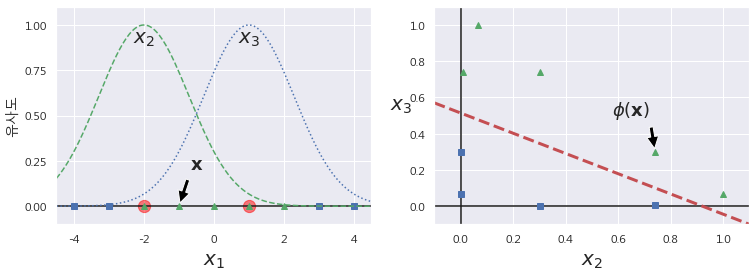

In [36]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

### 5.2.3 가우시안 RBF 커널

위의 5.2.2에서 살펴본 것처럼 유사도 특성을 추가하는 방법도 유용하게 사용될 수 있다. 하지만, 이러한 특성을 추가하기 위해서는 계산 비용이 많이 드는 문제가 있다. 

이를 가우시안 **RBF Kernel**을 이용하면 위와 같이 특성들을 계산하지 않고 비슷한 결과를 얻을 수 있다.

$$
K \left( \mathbf{a}, \mathbf{b} \right) = \text{exp} \left( -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^{2} \right)
$$

- $\gamma$ : regularization 역할을 함
    - $\gamma$가 커지면 종 모양이 좁아져 각 데이터의 영향 범위가 작아져, 결정 경계(Decision Boundary)가 불규칙하고 구부러진다.
    - $\gamma$가 작아지면 넓은 종 모양이 되며, 데이터의 영향이 넓어져 결정 경계가 부드러워 진다. 
- 따라서 모델이 overfit하는 경향이 있다면 $\gamma$를 줄여야 한다.

In [37]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

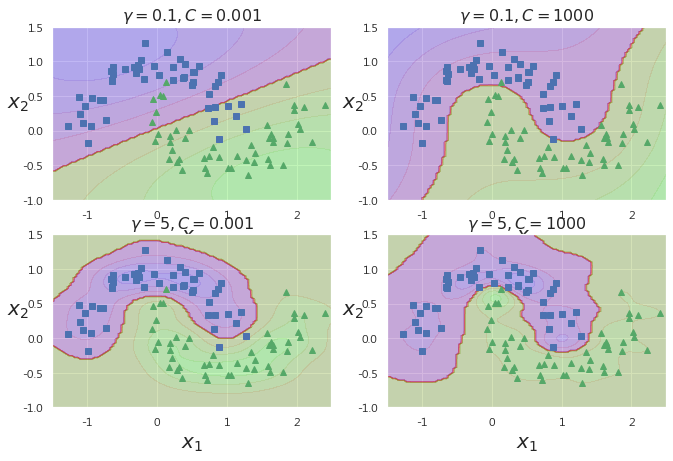

In [39]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

#### Tip : 어떤 커널(kernel)을 사용할까?

> 가장먼저 선형 커널(linear kernel)을 사용해본다. 특히, Train set이 매우 크거나, 특성 수가 많을 경우에 해당되며, Scikit-Learn에서는 `LinearSVC`가 `SVC(kernel='linear')` 보다 훨씬 빠르다. 

>Train set이 크지 않다면, 가우시안 RBF 커널을 시도하는 것이 좋고, 대부분의 경우 이 커널이 잘 맞는다고 한다.

## 5.3 SVM Regression

SVM은 선형, 비선형 분류 뿐만 아니라 선형, 비선형 회귀(regression)에도 사용할 수 있다. 

SVM을 회귀에 적용하는 방법은 분류와는 반대라고 할 수 있다. 분류에서는 정해진 margin 오류 안에서 두 클래스 간의 폭(너비)가 가능한 최대가 되도록 하는 것이었다. 하지만, 회귀에서는 마진(margin)의 밖이 오류에 해당하며, 마진 안쪽으로 최대한 많은 데이터들이 포함되도록 학습한다.

![](./images/svm-reg.png)

아래의 그림에서 마진 안쪽으로 Train set이 추가되어도 모델의 예측에는 영향을 주지 않기 때문에, SVM 회귀 모델을 **$\epsilon$에 민감하지 않다**($\epsilon$-insensitive)라고 한다.

아래의 예제는 Scikit-Learn의 `LinearSVR`과 `SVR` 을 이용해 선형, 비선형 SVM 회귀를 적용한 것이다.

#### LinearSVR을 이용한 선형 SVM 회귀

$$
y = 4 + 3x + \text{noise}
$$

In [40]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [41]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [42]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

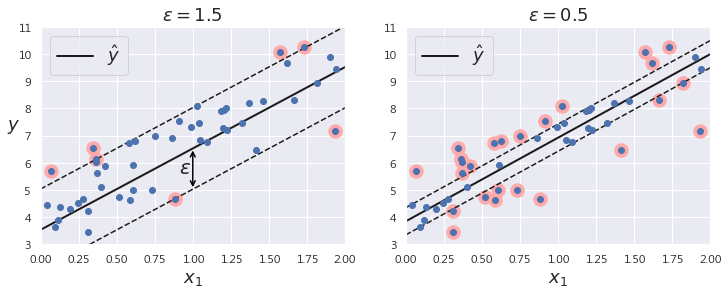

In [43]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5, 'color': 'black'}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### SVR을 이용한 비선형 SVM 회귀

$$
y = 0.2 + 0.1x + 0.5 x^{2} + \text{noise}
$$

In [44]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [45]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=1, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=1, epsilon=0.05)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.05, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

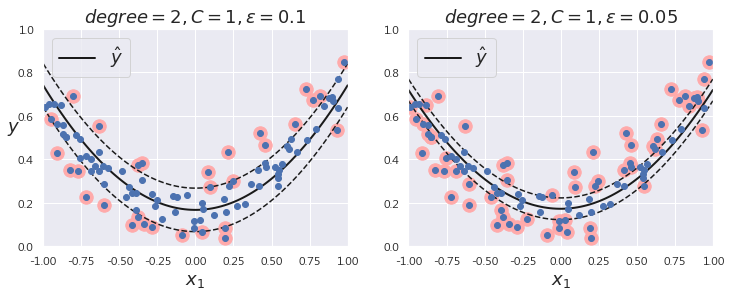

In [47]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

## 5.4 SVM 이론

아래의 그림에서 ① 분류기는 Train set을 틀리게 분류한다. 이를 여러번 학습시켜 모델링하면 ②와 ③ 분류기와 같이 될것이다. 

Train set 측면에서 보면 ②와 ③ 분류기는 오류가 0이므로 같은 성능을 가진 분류기로 볼 수 있다. 하지만, 일반화(generalization) 측면에서 보면 ② 보다 ③이 더 낫다고 할 수 있다. 그 이유는 ③ 분류기가 두 개의 클래스에 대해 **여백**(margin) 크기 때문이다. 

바로 여기서 이러한 여백, 즉 마진을 어떻게 공식화하고 이 마진을 최대화하는 결정 초평면(decision hyperplane)을 찾는 것이 바로 SVM의 발상이라 할 수 있다.

![](./images/svm03.PNG)

### 5.4.1 결정 함수와 예측

Linear SVM은 두 클래스를 분리하기 위한 선형 결정 함수를 찾는 것이며, 이러한 결정 함수는 다음과 같이 나타낼 수 있다.

$$
d (\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} + b = 0
$$

- $d(x)$는 전체 특성 공간을 두 영역으로 분할한다.
    - $d(x) = \mathbf{w}^{T} \mathbf{x} + b > 0$ → $w_1$
    - $d(x) = \mathbf{w}^{T} \mathbf{x} + b < 0$ → $w_2$

- 하나의 초평면을 표현하는 식은 여러가지가 있다.
    - $c \times (\mathbf{w}^{T} \mathbf{x} + b) = 0$

- $\mathbf{w}$는 초평면의 **법선벡터**다.
    - $\mathbf{w}$은 초평면의 방향을 나타내고, $b$는 위치를 나타낸다.

- 임의의 점 $\mathbf{x}$에서 초평면까지 거리는 $h = \frac{|d(x)|}{\| \mathbf{w} \|}$ 이다.

### 5.4.2 목적 함수

SVM에서 풀고자 하는 문제는 아래의 그림에서 마진(margin)을 가장 크게하는 결정 초평면의 방향, 즉 $\mathbf{w}$
를 찾는 것이다.

<img src="./images/svm04.PNG" height="40%" width="40%"/>

위의 그림에서 마진은 색이 칠해진 데이터 포인트에 의해 좌우된다. 이러한 데이터 포인트를 **서포트 벡터**(Support Vector)라고 한다. 서포트 벡터($\mathbf{x}$)에 대한 마진은 다음과 같다.

$$
\text{margin} = \frac{2 |d(\mathbf{x})|}{\left\| \mathbf{w} \right\|} = \frac{2}{\left\| \mathbf{w} \right\|}
$$

Train set을 $\mathbb{X} = \{ (\mathbf{x}_1, t_1), \dots , (\mathbf{x}_n, t_n) \}$ 로 표기하자. $t_i$는 클래스를 나타내며, $w_1$에 속하면 $t_i = 1$이고, $w_2$에 속하면 $t_i = -1$이 된다. 

위와 같은 조건 하에 최대 마진을 갖는 결정 초평면을 찾는 것은 **조건부 최적화 문제**(constrained optimization porblem)로 나타낼 수 있다. 아래의 조건식에서 등호(=)가 성립하는 데이터 포인트가 바로 서포트 벡터이다. 

아래와 같이 최대 마진을 구하는 문제를 역수를 취해, 최소화하는 문제로 바꿀 수 있다.

$$
\max{ \frac{2}{\| \mathbf{w} \|} } \rightarrow \min{\frac{1}{2} \| \mathbf{w} \|^{2}} = \min{\frac{1}{2} \mathbf{w}^{T} \cdot \mathbf{w} }
$$

$$
\text{s.t.}\quad t_i \left( \mathbf{w}^{T} \mathbf{x}_i + b \right) \ge 1 \quad i = 1, \dots , n
$$

위의 문제의 두 가지 측면에서 보면 다음과 같다.

- **해의 유일성(uniqueness)**
    - $\mathbf{w}$의 2차항만 가지므로 볼록(convex)한 함수이며, 조건식은 $n$개 모두 선형이다. 따라서, 유일한 해를 가진다.

- **문제의 난이도**
    - 위의 문제는 $n$개의 선형 부등식을 가진 2차함수의 최적화 문제이며, $n$의 개수는 엄청나게 클 수 있다. 이러한 경우에 **라그랑제 승수**(Lagrange multiplier)를 이용해 해결할 수 있다.

#### 라그랑제 승수법

위의 문제를 살펴보기 전에 먼저 라그랑제 승수법(Lagrange multiplier method)에 대해 알아보자. 

라그랑제 승수법의 기본 개념은 제약이 있는 최적화 문제에서 목적함수로 제약을 옮김으로써 제약이 없는 문제로 변환하는 것이다. 

간단한 예로 라그랑제 승수법을 살펴보도록 하자. 아래와 같이 **등식 제약**의 조건 하에서 함수 $f(x, y)$를 최소화 하는 $x, y$를 찾는 문제를 보자.

$$
\min{f(x,y) = x^2 + 2y}
$$

$$
\text{s.t.} \quad 3x+2y+1 = 0 
$$

위의 식을 라그랑제 승수법을 사용하기 위해 **라그랑제 함수**(Lagrangian, Lagrange function)로 다음과 같이 정의하자.

$$
L(x, y, \alpha) = f(x, y) - \alpha \left( 3x + 2y +1 \right) = x^2 + 2y - \alpha \left( 3x + 2y +1 \right)
$$

조제프루이 라그랑제(Joseph-Louis Lagrange)는 위의 라그랑지안 함수 $L(\cdot)$처럼 $(\hat{x}, \hat{y})$가 제약이 있는 최적화 문제의 해라면, $(\hat{x}, \hat{y}, \hat{\alpha})$가 함수 $L(\cdot)$의 **정류점**(stationary point) 즉, 모든 편도함수(partial derivative)가 0인 지점이 되는 $\hat{\alpha}$가 존재한다는 것을 보였다.

따라서, $x, y, \alpha$에 대한 라그랑지안 $L(x, y, \alpha)$의 편도함수를 계산할 수 있으면 이 도함수가 모두 0이 되는 지점을 찾을 수 있고, 제약이 있는 최적화 문제의 해는 이런 정류점 중에 있어야 한다.

위의 식에서 편도함수는 다음과 같다.

$$
\frac{\partial}{\partial x} L(x, y, \alpha) = 2x - 3\alpha
$$

$$
\frac{\partial}{\partial y} L(x, y, \alpha) = 2 - 2 \alpha
$$

$$
\frac{\partial}{\partial \alpha} L(x, y, \alpha) = -3x -2y -1
$$

모든 편도함수가 0이면, $2 \hat{x} - 3 \hat{\alpha} = 2 - 2 \hat{\alpha} = -3 \hat{x} - 2 \hat{y} - 1=0$ 이므로, $\hat{x} = \frac{3}{2}$, $\hat{y} = - \frac{11}{4}$, $\hat{\alpha} = 1$을 계산할 수 있다.

#### 라그랑제 함수로 변환

위의 조건식에서 각 조건식 마다 라그랑제 승수 $\alpha_i$를 부여한다. 이들의 벡터를 $\mathbf{\alpha} = (\alpha_1, \dots , \alpha_n)^{T}$로 표기하자. 

$$
L(\mathbf{w}, b, \mathbf{\alpha}) = \frac{1}{2} \| \mathbf{w} \|^{2} - \sum_{i=1}^{n}{\alpha_{i} \left( t_{i} \left( \mathbf{w}^{T} \mathbf{x}_{i} +b \right) -1 \right)}
$$

#### KKT(Karush-Kuhn-Tucker) 조건

위에서 살펴본 예제는 등식 제약 조건부 최적화 문제였다. 하지만, SVM은 **부등식 제약**(inequality constrained) 최적화 문제이다(예를들어 $3x + 2y + 1 \ge 0$). 

이러한 부등식 제약 최적화 문제는 다음과 같이 세 가지 **KKT**조건을 이용해 풀수 있다. KKT 조건은 **필요 조건** 이므로 반드시 만족해야 한다.

- 라그랑제 함수 $L(\mathbf{w}, b, \mathbf{\alpha})$에서 라그라제 승수를 제외한 $\mathbf{w}, b$로 편미분한  식이 $0$이되어야 한다.

$$
\frac{\partial L(\mathbf{w}, b, \mathbf{\alpha})}{\partial \mathbf{w}} = \frac{\partial L(\mathbf{w}, b, \mathbf{\alpha})}{\partial b} = 0
$$

- 모든 라그랑제 승수 $\mathbf{\alpha} = \{ \alpha_1, \dots, \alpha_n \}$은 0보다 크거나 같아야 한다.

$$
\alpha_i \ge 0, \quad i = 1, \dots, n
$$

- 모든 조건식에 대해 $\alpha_i = 0$ 이거나 $t_{i} \left( \mathbf{w}^{T} \mathbf{x}_{i} +b \right) -1 = 0$ 이 되어야 한다. 이때, $t_{i} \left( \mathbf{w}^{T} \mathbf{x}_{i} +b \right) = 1$인 데이터 포인트가 바로 **서포트 벡터**이다.

### 5.4.3 Wolfe 쌍대(Dual) 문제

위에서 SVM 문제는 볼록 성질을 만족한다는 것을 알 수 있었다. 이러한 볼록 성질을 만족하는 조건부 최적화 문제는 **Wolfe dual** 문제로 변환할 수 있다. 

- 원래(primal) 문제가 $f_i (\theta) \ge 0$, $i = 1, \dots, n$이라는 조건 하에 $J(\theta)$를 최소화 하는 문제라고 하면 쌍대(dual) 문제는 $\partial L(\theta, \alpha)/\partial \theta = 0$과 $\alpha_i \ge 0$, $i = 1, \dots, n$이라는 두 가지 조건 하에 $L(\theta, \alpha) = J(\theta) - \sum_{i=1}^{n}{\alpha_i f_i(\theta)}$ 를 최대화 하는 문제로 표현할 수 있다.

따라서, 위의 라그랑지안 SVM 문제를 쌍대 문제로 나타내면 다음과 같다.

\begin{align*}
\frac { \partial L(w,b,{ \alpha  }_{ i }) }{ \partial w } =0\quad &\rightarrow \quad w=\sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i }{ x }_{ i } } \\ \frac { \partial L(w,b,{ \alpha  }_{ i }) }{ \partial b } =0\quad &\rightarrow \quad \sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i } } =0
\end{align*}

위의 식을 $L(\mathbf{w}, b, \mathbf{\alpha})$에 대입하여 정리하면 다음과 같다.

\begin{align*}
\frac { 1 }{ 2 } { \left\| w \right\|  }^{ 2 }&=\frac { 1 }{ 2 } { w }^{ T }w\\ &=\frac { 1 }{ 2 } { w }^{ T }\sum _{ j=1 }^{ n }{ { \alpha  }_{ j }{ t }_{ j }{ x }_{ j } } \\ &=\frac { 1 }{ 2 } \sum _{ j=1 }^{ n }{ { \alpha  }_{ j }{ t }_{ j }{ ({ w }^{ T }x }_{ j }) } \\ &=\frac { 1 }{ 2 } \sum _{ j=1 }^{ n }{ { \alpha  }_{ j }{ t }_{ j }{ (\sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i }{ x }_{ i }^{ T }{ x }_{ j } }  }) } \\ &=\frac { 1 }{ 2 } \sum _{ i=1 }^{ n }{ \sum _{ j=1 }^{ n }{ { \alpha  }_{ i }{ { \alpha  }_{ j }t }_{ i }{ t }_{ j }{ x }_{ i }^{ T }{ x }_{ j } }  } 
\end{align*}

\begin{align*}
-\sum _{ i=1 }^{ n }{ { \alpha  }_{ i }({ t }_{ i }({ w }^{ T }{ x }_{ i }+b)-1) } &=-\sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i }({ w }^{ T }{ x }_{ i }+b) } +\sum _{ i=1 }^{ n }{ { \alpha  }_{ i } } \\ &=-\sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i }{ w }^{ T }{ x }_{ i } } -b\sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i } } +\sum _{ i=1 }^{ n }{ { \alpha  }_{ i } } \\ &=-\sum _{ i=1 }^{ n }{ \sum _{ j=1 }^{ n }{ { \alpha  }_{ i }{ { \alpha  }_{ j }t }_{ i }{ t }_{ j }{ x }_{ i }^{ T }{ x }_{ j } }  } +\sum _{ i=1 }^{ n }{ { \alpha  }_{ i } }
\end{align*}

최종적으로 다음과 같이 Dual 문제로 쓸 수 있다.

$$
\max { { L }({ \alpha  }_{ i }) } =\sum _{ i=1 }^{ n }{ { \alpha  }_{ i } } -\frac { 1 }{ 2 } \sum _{ i=1 }^{ n }{ \sum _{ j=1 }^{ n }{ { \alpha  }_{ i }{ { \alpha  }_{ j }t }_{ i }{ t }_{ j }{ x }_{ i }^{ T }{ x }_{ j } }  }
$$

$$
\text{s.t.} \quad \sum _{ i=1 }^{ n }{ { \alpha  }_{ i }{ t }_{ i } } =0
\\{ \alpha  }_{ i }\ge 0,\quad i=1,...,n
$$

위의 식은 다음과 같은 특징이 있다.

- 하나의 등식 조건과 $n$개의 부등식 조건을 가진 **2차(quadratic)** 목적함수의 최대화 문제이다.
- $\mathbf{w}$와 $b$가 사라졌으므로, 라그랑제 승수 $\mathbf{\alpha}$를 구하는 문제가 되었다. 따라서, $\mathbf{\alpha}$를 구하면 $\mathbf{w}$와 $b$를 구할 수 있다.
- 목적함수에서 특성 벡터 $\mathbf{x}_i$가 **내적** $\mathbf{x}_{i}^{T} \cdot \mathbf{x}_{j}$로 나타난다. 이러한 점은 선형 SVM을 비선형 SVM으로 즉, **Kernel SVM**으로 확장하는데 결정적인 역할을 한다.

#### 5.4.4 Soft Margin SVM

아래의 그림처럼 여유 변수(slack varibles, $\zeta$)를 추가한 소프트 마진 SVM(soft margin SVM)의 목적함수는 다음과 같다. 

$$
\min{\frac{1}{2} \| \mathbf{w} \|^{2}} + C \sum_{i=1}^{m}{\zeta_{i}}
$$

$$
\text{s.t.}\quad t_i \left( \mathbf{w}^{T} \mathbf{x}_i + b \right) \ge 1 - \zeta_{i} \quad i = 1, \dots , n, \quad \zeta_i \ge 0
$$

위의 식을 다음과 같이 해석할 수 있다. 

> Margin을 최대한 크게 하며, 동시에 $\zeta > 0$인 테이터의 수를 최소한으로 하는 결정 초평면의 방향 $\mathbf{w}$를 찾아라.

<img src="./images/svm_slack.png" height="65%" width="65%"/>

위의 식에서 $C$는 일종의 **penalty**라고 볼 수 있다. 

- $C$를 작게한다는 것은 마진을 나타내는 첫번째 항 ($\frac{1}{2} \| \mathbf{w} \|^{2}$)을 중요하게 생각하는 것으로 볼 수 있다.
- 반대로 $C$를 크게한다는 것은 마진을 줄이는 대신 마진 사이에 존재하는 데이터 그리고 틀린 데이터의 수를 줄이겠다는 의미이다.

### 5.4.5 Loss Function

Soft Margin SVM은 어느정도의 오류를 포함하기 때문에 이를 손실함수(loss function)를 이용해 최적화 할 수 있다.
위의 5.4.4에서 Soft Margin SVM 의 제약식,

$$
t_i \left( \mathbf{w}^{T} \mathbf{x}_i + b \right) \ge 1 - \zeta_{i}
$$

은 다음과 같이 나타낼 수 있다.

$$
\zeta_{i} = \max{\left( 0,1 - t_i \left( \mathbf{w}^{T} \mathbf{x}_i + b \right) \right)}
$$

따라서, 위의 식을 손실함수 측면에서 보면 다음과 같이 손실함수를 정의할 수 있다.

$$
J(\mathbf{w}, b) = \frac{1}{2} \| \mathbf{w} \|^{2} + C \sum_{i=1}^{n}{\max{\left( 0,1 - t_i \left( \mathbf{w}^{T} \mathbf{x}_i + b \right) \right)}}
$$

$\max{0,1-t}$ 형태를 **hinge loss** 함수라고 한다. 

<img src="./images/hinge.PNG" height="50%" width="50%"/>

### 5.4.5 Kernel SVM

선형으로 분리되지 않는 데이터를 비선형 매핑, 즉 커널 함수를 이용해 저차원($\text{L}$)에서 고차원($\text{H}$)으로의 매핑(mapping)을 통해 해결할 수 있다. 이러한 커널함수를 이용하는 SVM을 Kernel SVM이라 한다.

커널함수는 두 개의 벡터(데이터)를 입력으로 가지며, $K(\mathbf{a}, \mathbf{b})$형태로 나타낸다. 이러한 커널 함수는 다음 성질을 만족해야 한다.

- $\mathbf{L}$ 공간 상의 두 벡터 $\mathbf{a}$와 $\mathbf{b}$를 입력 변수로 갖는 커널 함수 $K(\mathbf{a}, \mathbf{b})$는 $K(\mathbf{a}, \mathbf{b}) = \Phi (\mathbf{a}) \cdot \Phi (\mathbf{b})$를 만족하는 매핑 함수 $\Phi(\cdot)$가 존재해야 한다. 이를 **머서(Mercer)의 정리**라고 한다.
- 즉, 커널함수의 값과 $\mathbf{H}$상으로 매핑된 두 점 $\Phi(\mathbf{a})$와 $\Phi(\mathbf{b})$의 내적이 같아야 한다.

위의 성질을 간단한 예를 통해서 알아보자. 2차원의 공간을 3차원의 공간으로 매핑하는 커널함수는 다음과 같이 나타낼 수 있다. 

두개의 벡터를 $\mathbf{a} = (a_1, a_2)^{T}$, $\mathbf{b} = (b_1, b_2)^{T}$ 

\begin{align*}
K \left(\mathbf{a}, \mathbf{b} \right) &= \left( \mathbf{a} \cdot \mathbf{b} \right)^{2} \\ &= a_{1}^{2}b_{1}^{2} + 2a_1b_1a_2b_2 + a_{2}^{2}b_{2}^{2} \\ &= \left( a_{1}^{2}, \sqrt{2}a_1a_2, a_{2}^{2} \right) \cdot \left( b_{1}^{2}, \sqrt{2}b_1b_2, b_{2}^{2} \right)^{T} \\ &= \Phi(\mathbf{a})^{T} \cdot \Phi(\mathbf{b})
\end{align*}

$$
\Phi(\mathbf{a})^{T} \cdot \Phi(\mathbf{b}) = \begin{bmatrix} a_1^{2} \\ \sqrt{2} a_1a_2 \\ a_2^{2} \end{bmatrix}^{T} \cdot \begin{bmatrix} b_1^{2} \\ \sqrt{2} b_1b_2 \\ b_2^{2} \end{bmatrix}
$$

![](./images/kernel.png)

Kernel SVM을 사용하면 목적함수를 다음과 같이 나타낼 수 있다.

\begin{align*}
\max { { L }({ \alpha  }_{ i }) } &= \sum _{ i=1 }^{ n }{ { \alpha  }_{ i } } -\frac { 1 }{ 2 } \sum _{ i=1 }^{ n }{ \sum _{ j=1 }^{ n }{ { \alpha  }_{ i }{ { \alpha  }_{ j }t }_{ i }{ t }_{ j } \Phi({ x }_{ i })^{ T }\Phi({ x }_{ j }) }  } \\&=  \sum _{ i=1 }^{ n }{ { \alpha  }_{ i } } -\frac { 1 }{ 2 } \sum _{ i=1 }^{ n }{ \sum _{ j=1 }^{ n }{ { \alpha  }_{ i }{ { \alpha  }_{ j }t }_{ i }{ t }_{ j } K({ x }_{ i }, x_j) }  }
\end{align*}

#### 커널의 종류

Scikit-Learn의 [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 클래스에서 제공하는 커널의 종류는 다음과 같다. 각 변수에 대한 자세한 내용은 해당 링크를 참고하면 된다. 

- **선형(linear)** : $K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^{T} \cdot \mathbf{b}$
- **다항식(poly)** : $K(\mathbf{a}, \mathbf{b}) = \left( \gamma \mathbf{a}^{T} \cdot  \mathbf{b} + r \right)^{d}$
- **가우시안 RBF(rbf)** : $K(\mathbf{a}, \mathbf{b}) = \text{exp} \left( -\gamma \| \mathbf{a} - \mathbf{b} \|^{2} \right)$
- **시그모이드(sigmoid)** : $K(\mathbf{a}, \mathbf{b}) = \tanh {\left( \gamma \mathbf{a}^{T} \cdot  \mathbf{b} + r \right)}$